HW_03 KNN
Vidhi Kansara 
CS 513 B
CWID - 20029476

In [ ]:
# VK_20029476
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# VK_20029476
# Load the dataset
df = pd.read_csv('breast-cancer-wisconsin.csv')

# Check for any missing values or data structure
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# VK_20029476
# Replace '?' with NaN and handle missing values
df.replace('?', np.nan, inplace=True)
df['F6'] = pd.to_numeric(df['F6'], errors='coerce')  # Convert to numeric, coercing errors to NaN
df.fillna(df.mean(), inplace=True) 

In [ ]:
# VK_20029476
# Extract features (X) and target (y)
X = df.drop(columns=['Sample', 'Class'])  # Dropping 'Sample' and 'Class' columns
y = df['Class']

In [ ]:
# VK_20029476
print(X.shape)
print(y.shape)

(699, 9)
(699,)


In [ ]:
# VK_20029476
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# VK_20029476
# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# VK_20029476
from typing import Counter
from sklearn.neighbors import NearestNeighbors  # Efficient nearest neighbor search

# Euclidean distance function using vectorization
def euclidean_distance(X1, X2):
    return np.linalg.norm(X1 - X2, axis=1)

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        # Use nearest neighbors to find k closest points
        neigh = NearestNeighbors(n_neighbors=self.k)
        neigh.fit(self.X_train)
        
        # Find the indices of the k nearest neighbors for each test point
        distances, indices = neigh.kneighbors(X_test)
        
        predictions = []
        for idx in indices:
            # Get the labels of the k nearest neighbors
            k_nearest_labels = self.y_train.iloc[idx]
            # Get the most common label
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        
        return np.array(predictions)
    
# Function to evaluate KNN with different k values and create visualizations
def evaluate_knn(k_values):
    accuracies = []
    
    # Create a plot for decision boundaries
    plt.figure(figsize=(18, 6))
    
    for i, k in enumerate(k_values, 1):
        # Initialize KNN classifier with value
        knn = KNN(k=k)
        # Fit the model
        knn.fit(X_train, y_train)
        # Make predictions
        y_pred = knn.predict(X_test)
        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        
        # Print evaluation metrics
        print(f"Evaluation for k={k}:")
        print("Accuracy:", acc)
        print(classification_report(y_test, y_pred))
        print("-" * 50)
        
        # Plot Decision Boundaries (only works with 2D features, so use PCA)
        if i == 1:  # To only create a decision boundary plot once for 2D
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X_scaled)  # Reduce dimensions to 2
            
            # Create mesh grid for plotting decision regions
            h = .02  # Step size in the mesh grid
            x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
            y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))

            # Predict on mesh grid
            Z = knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
            Z = Z.reshape(xx.shape)

            # Plot the decision boundary
            plt.subplot(1, len(k_values), i)
            plt.contourf(xx, yy, Z, alpha=0.8)
            plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', s=50)
            plt.title(f"Decision Boundary for k={k}")
            plt.xlabel("Principal Component 1")
            plt.ylabel("Principal Component 2")

    # Show decision boundary plots
    plt.tight_layout()
    plt.show()

    # Confusion Matrix 
    knn_final = KNN(k=k_values[-1])
    knn_final.fit(X_train, y_train)
    y_pred_final = knn_final.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred_final)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.title(f"Confusion Matrix for k={k_values[-1]}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Evaluation for k=3:
Accuracy: 0.9761904761904762
              precision    recall  f1-score   support

           2       0.98      0.99      0.98       143
           4       0.97      0.96      0.96        67

    accuracy                           0.98       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210

--------------------------------------------------


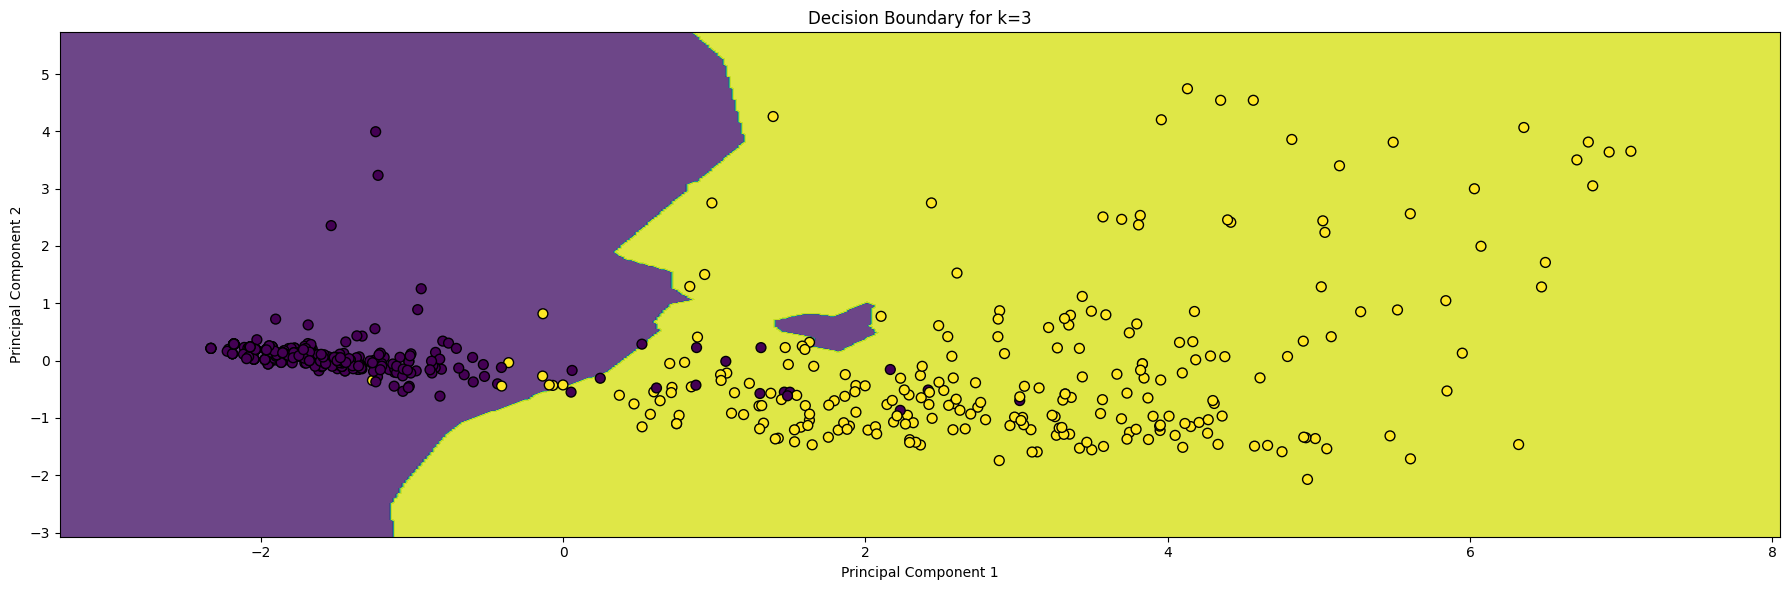

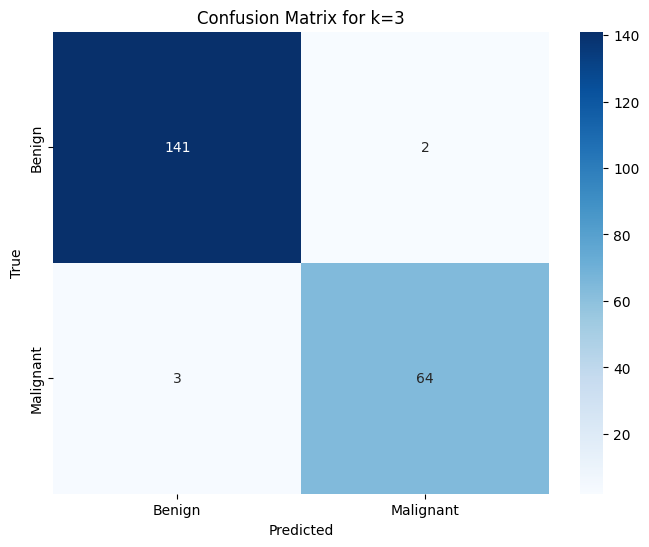

In [ ]:
# VK_20029476
evaluate_knn([3])

Evaluation for k=5:
Accuracy: 0.9619047619047619
              precision    recall  f1-score   support

           2       0.96      0.99      0.97       143
           4       0.97      0.91      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210

--------------------------------------------------


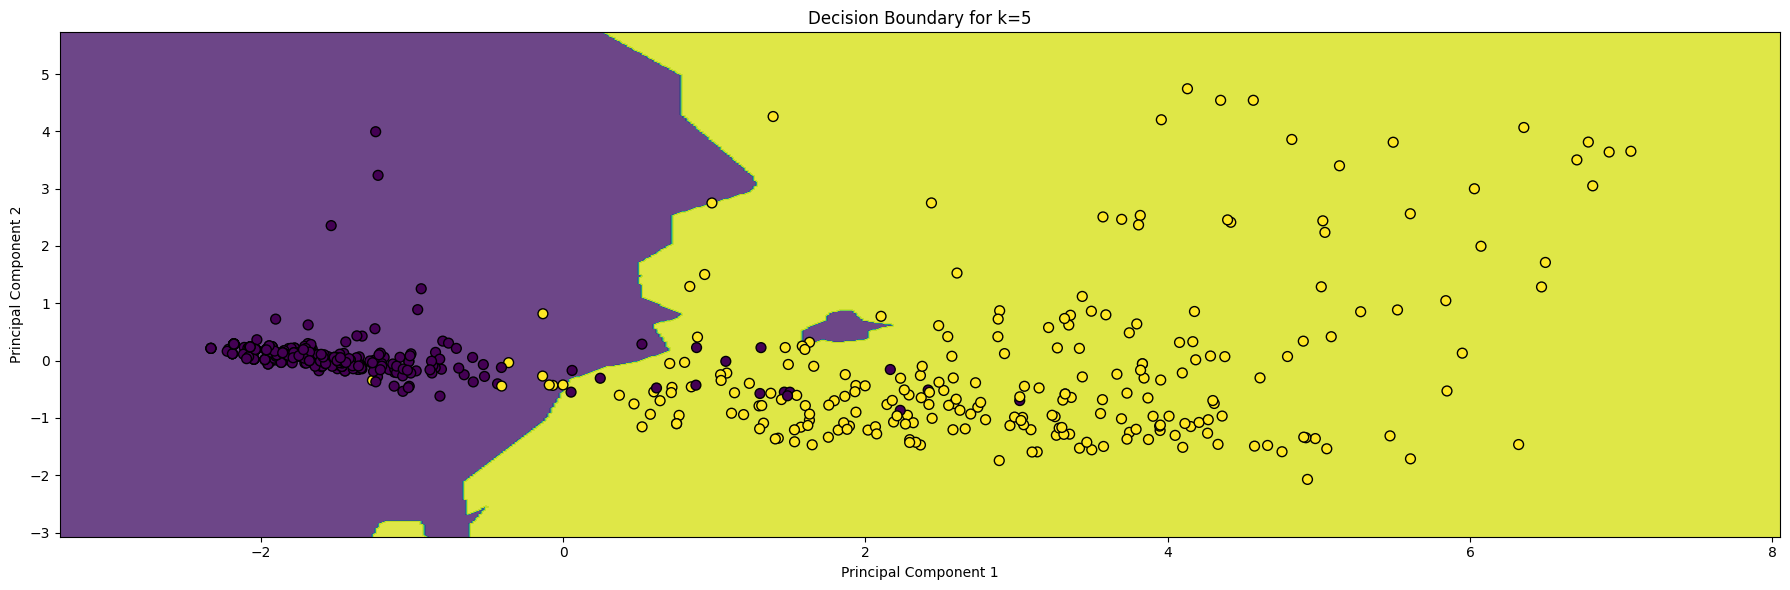

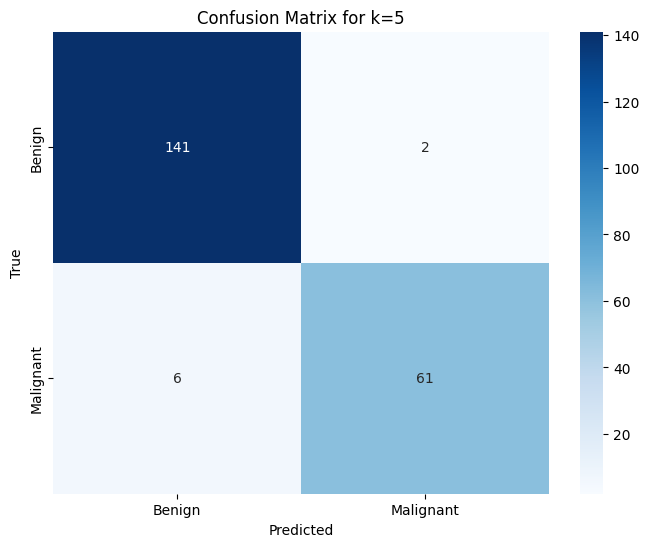

In [ ]:
# VK_20029476
evaluate_knn([5])

Evaluation for k=10:
Accuracy: 0.9761904761904762
              precision    recall  f1-score   support

           2       0.98      0.99      0.98       143
           4       0.97      0.96      0.96        67

    accuracy                           0.98       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210

--------------------------------------------------


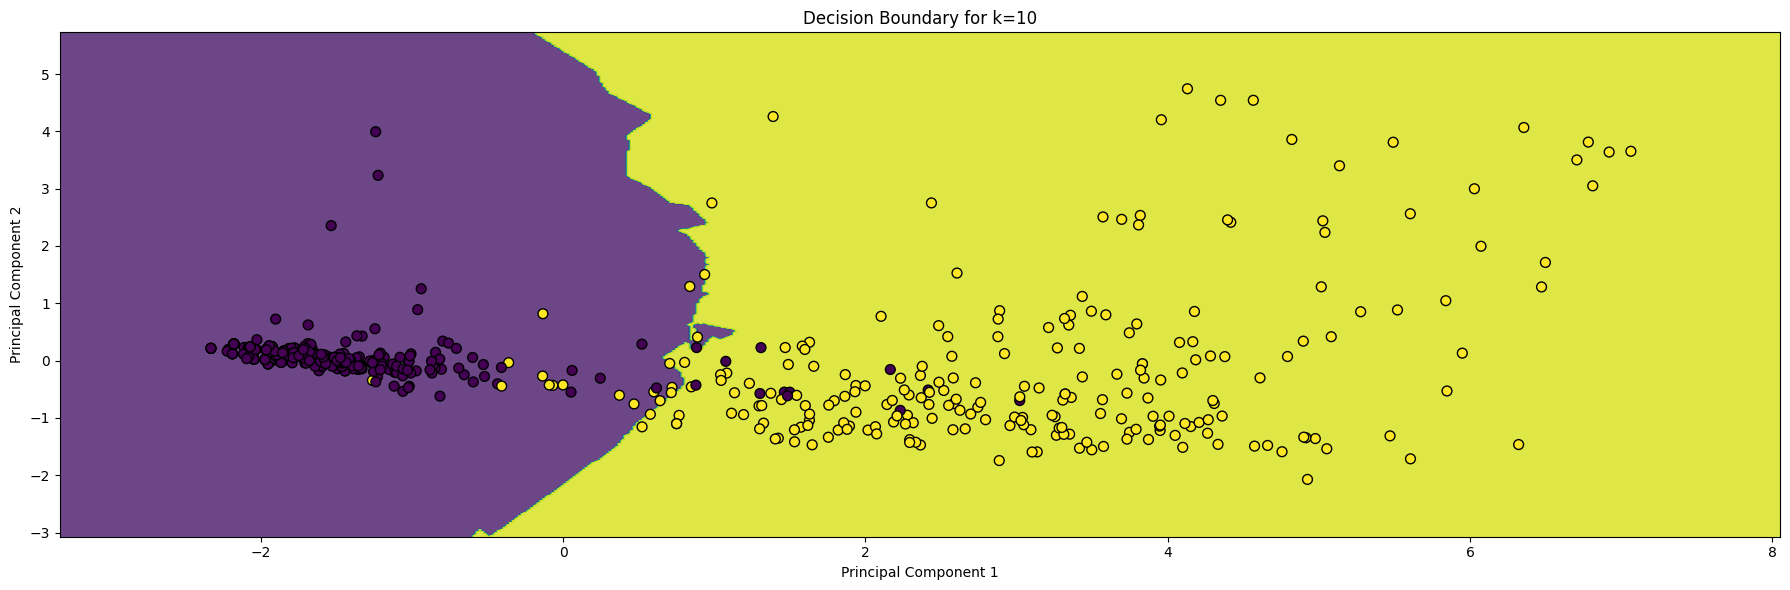

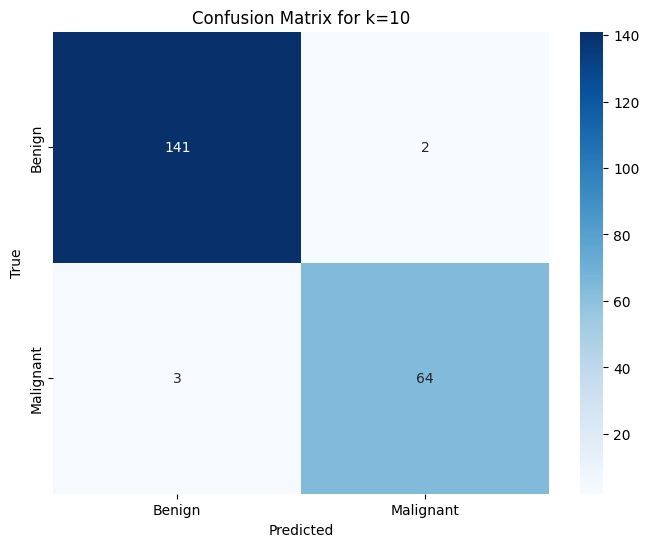

In [ ]:
# VK_20029476
evaluate_knn([10])